In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as sts

In [3]:
data = pd.read_csv('vah.csv')
experiment_1 = {"U": data.U[:8], 
                "I": data.I[:8]}
experiment_1 = pd.DataFrame(experiment_1)
experiment_2 = {"U": data.U[8:], 
                "I": data.I[8:]}
experiment_2 = pd.DataFrame(experiment_2)

Text(0.5, 1.0, 'Экспериментальные данные')

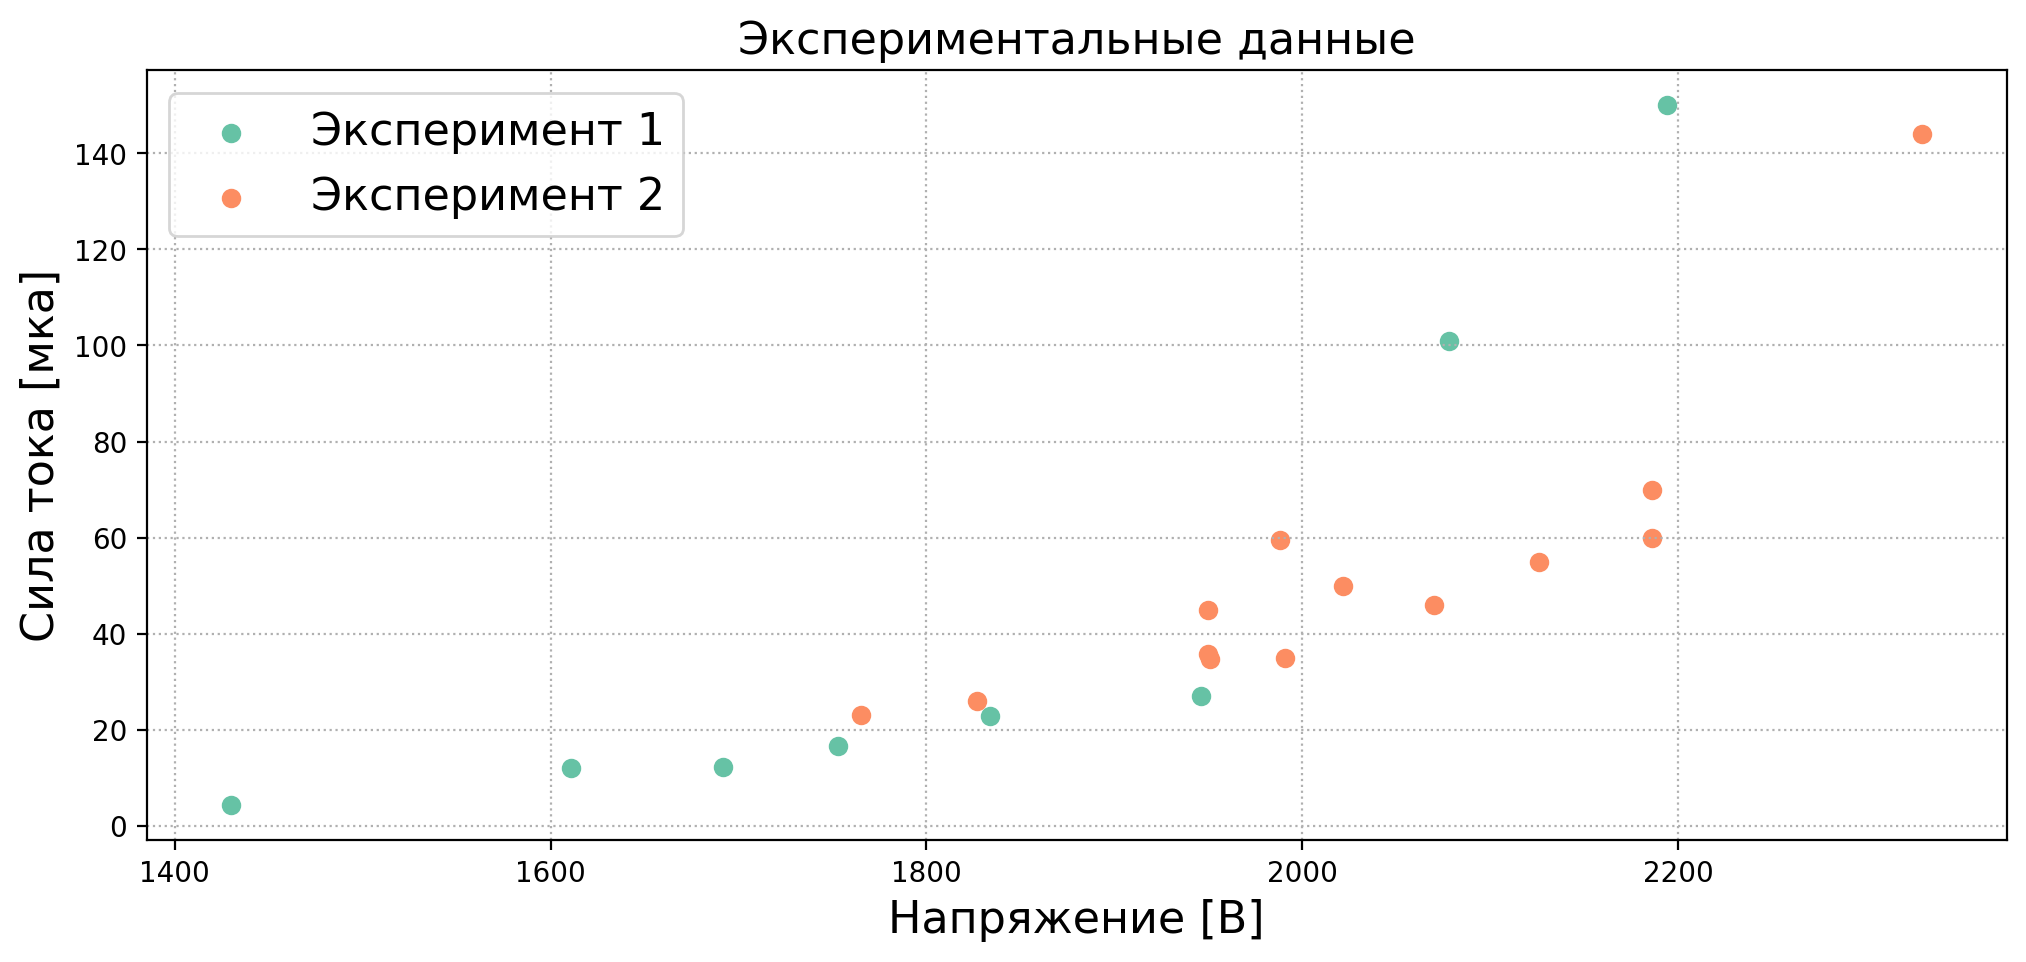

In [4]:


plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(data.U[:8], data.I[:8], label = 'Эксперимент 1', color = cm.Set2(0))
plt.scatter(data.U[8:], data.I[8:], label = 'Эксперимент 2', color = cm.Set2(1))
plt.xlabel("Напряжение [В]", fontsize = 16)
plt.ylabel("Сила тока [мка]", fontsize = 16)
plt.grid(ls = ':')
plt.legend(fontsize = 16)
plt.title("Экспериментальные данные", fontsize = 16)


In [5]:
one_by_U_line = np.linspace(0.0004, 0.00071, 1000)

MNK_1 = sts.linregress(1 / experiment_1.U, np.log(experiment_1.I / np.power(experiment_1.U, 2)))
MNK_2 = sts.linregress(1 / experiment_2.U, np.log(experiment_2.I / np.power(experiment_2.U, 2)))

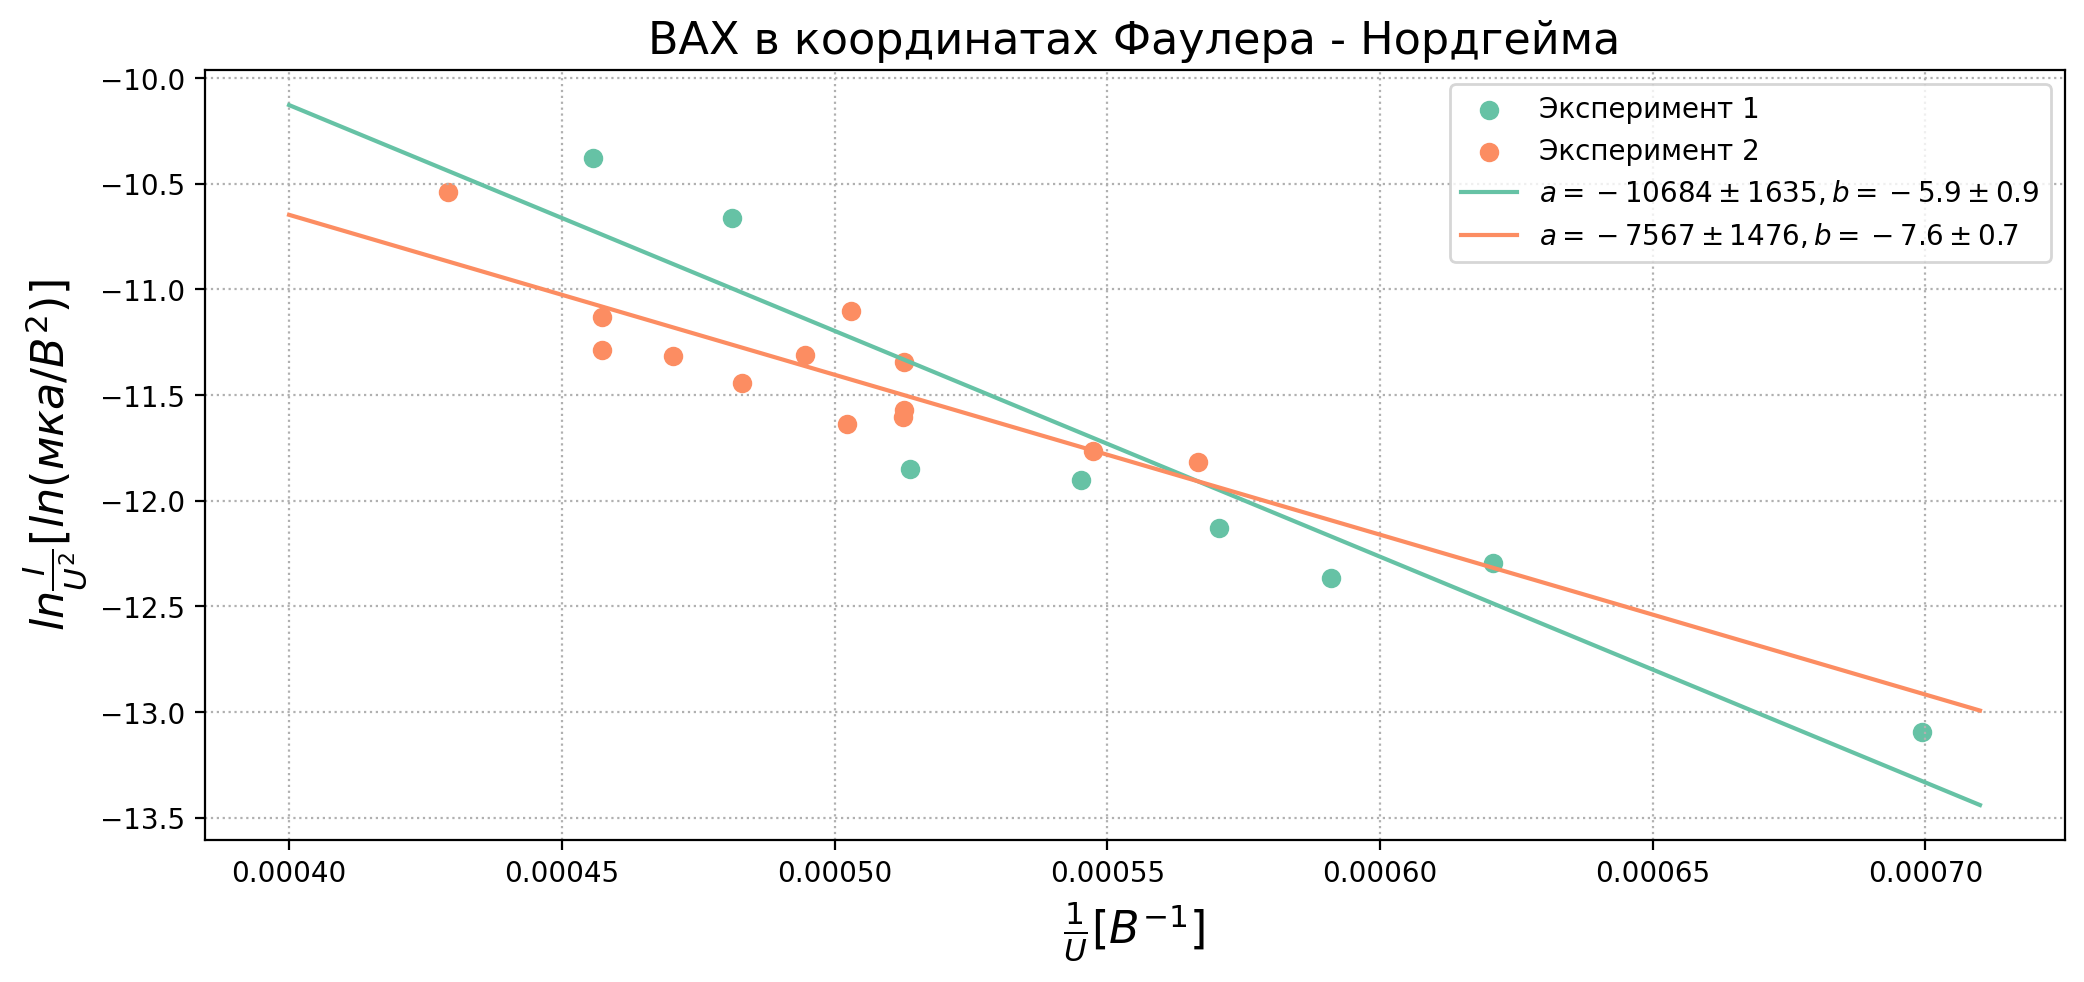

In [6]:
plt.figure(figsize = (12, 5), dpi = 200)

plt.scatter(1 / experiment_1.U, np.log(experiment_1.I / np.power(experiment_1.U, 2)), color = cm.Set2(0), label = 'Эксперимент 1')
plt.scatter(1 / experiment_2.U, np.log(experiment_2.I / np.power(experiment_2.U, 2)), color = cm.Set2(1), label = 'Эксперимент 2')
plt.plot(one_by_U_line, 
         MNK_1.slope * one_by_U_line + MNK_1.intercept, 
         label = f'$a = {MNK_1.slope:.0f} \pm {MNK_1.stderr:.0f}, b = {MNK_1.intercept:.1f} \pm {MNK_1.intercept_stderr:.1f}$',
         color = cm.Set2(0))
plt.plot(one_by_U_line, 
         MNK_2.slope * one_by_U_line + MNK_2.intercept, 
         label = f'$a = {MNK_2.slope:.0f} \pm {MNK_2.stderr:.0f}, b = {MNK_2.intercept:.1f} \pm {MNK_2.intercept_stderr:.1f}$',
         color = cm.Set2(1))
plt.xlabel(r"$\frac{1}{U} [В^{-1}]$", fontsize = 16)
plt.ylabel(r"$ln \frac{I}{U^{2}} [ln(мка / В^{2})]$", fontsize = 16)
plt.legend()
plt.grid(ls = ":")
plt.title("ВАХ в координатах Фаулера - Нордгейма", fontsize = 16);

In [9]:
print("Эксперимент 1, beta = ", -0.683 * np.power(10, 3) * np.power(4.81, 3/2) * np.power(10, 8) / (MNK_1.slope ), "+/-", np.abs(-0.683 * np.power(10, 3) * np.power(4.81, 3/2) * MNK_1.stderr * np.power(10, 8) / np.power(MNK_1.slope, 2))) 
print("Эксперимент 2, beta = ", -0.683 * np.power(10, 3) * np.power(4.81, 3/2) * np.power(10, 8) / MNK_2.slope, "+/-", np.abs(-0.683 * np.power(10, 3) * np.power(4.81, 3/2) * MNK_2.stderr * np.power(10, 8)/ np.power(MNK_2.slope, 2))) 

Эксперимент 1, beta =  67437656.71503668 +/- 10320335.612573327
Эксперимент 2, beta =  95220115.38462093 +/- 18569127.305988174


5.119670417061963


(-9.0, -5.0)

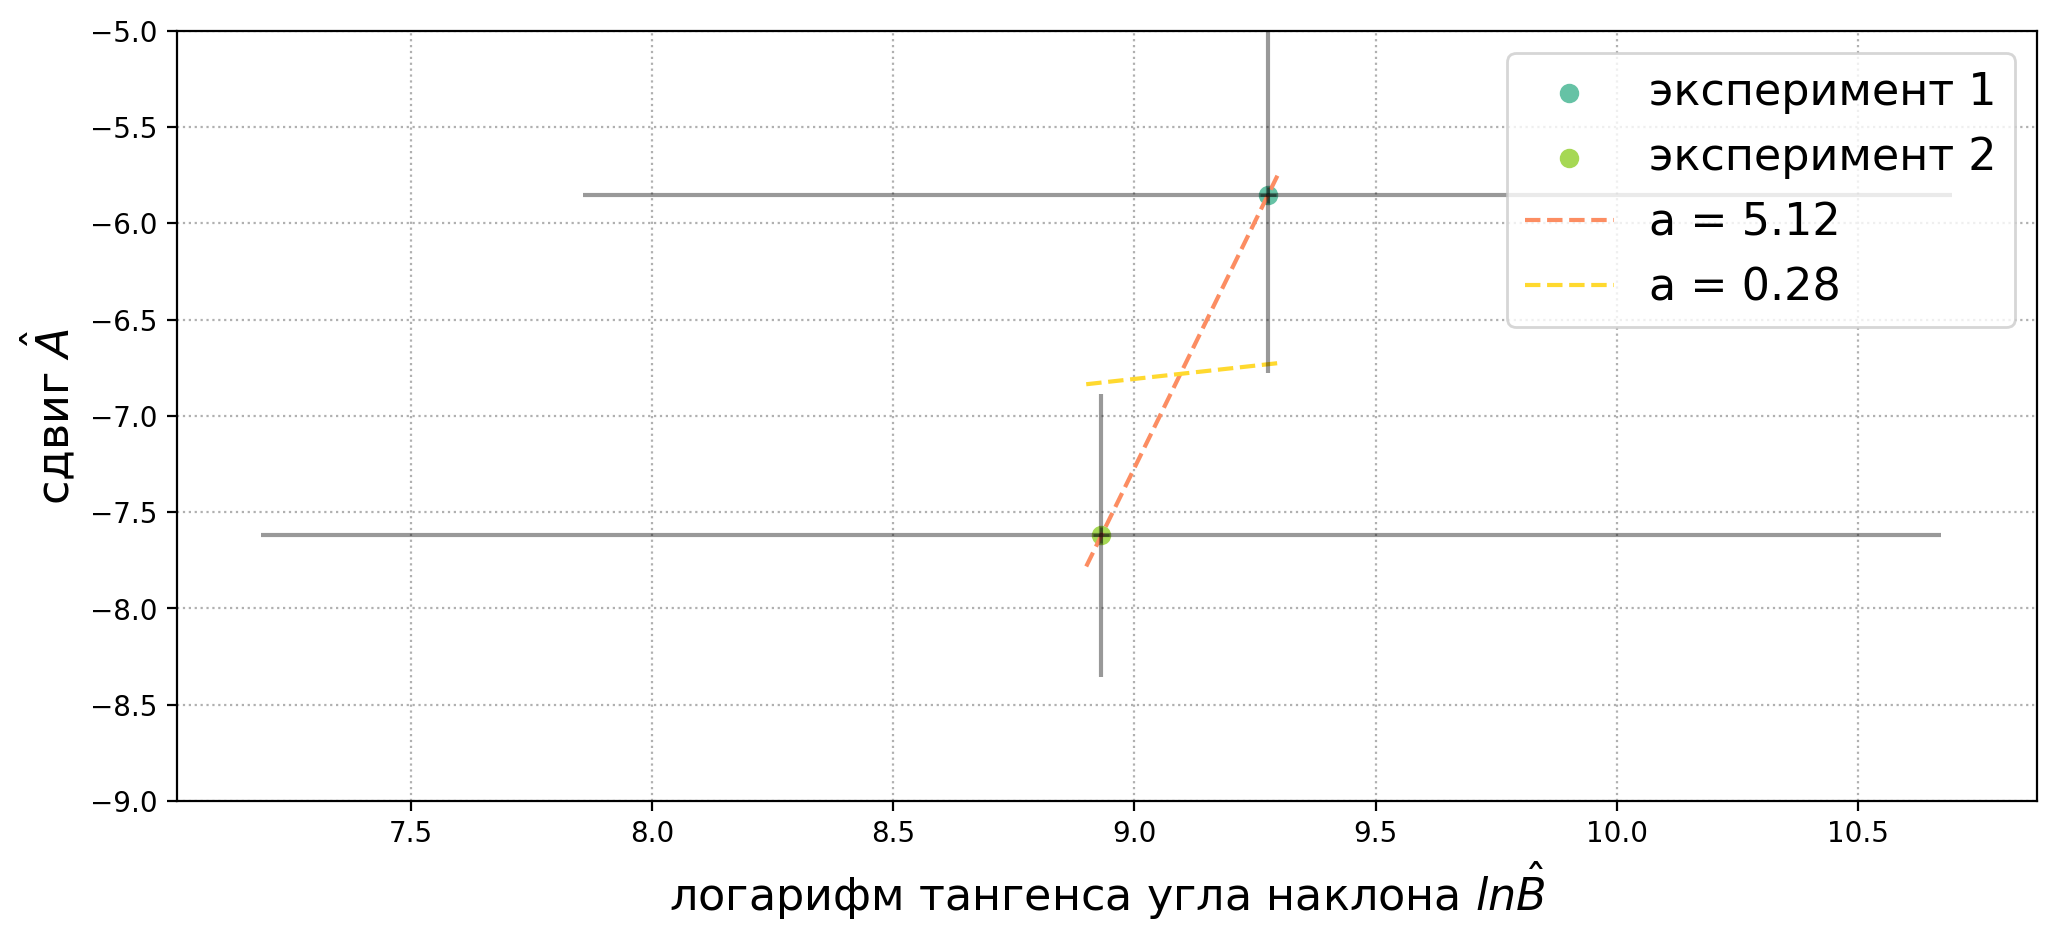

In [8]:
plt.figure(figsize = (12, 5), dpi = 200)
A = np.array([MNK_1.intercept, MNK_2.intercept])
B = np.array([MNK_1.slope, MNK_2.slope])
A_error = np.array([MNK_1.intercept_stderr, MNK_2.intercept_stderr])
B_error = np.array([MNK_1.stderr, MNK_2.stderr])
A_line = np.linspace(8.9, 9.3, 100)
m = sts.linregress(np.log(np.abs(B)), A)
print(m.slope)
umn = np.array([1, -1])
m_min = sts.linregress(np.log(np.abs(B + np.abs(B_error))), A - umn * np.abs(A_error))

plt.scatter(np.log(np.abs(B[0])), A[0], label = 'эксперимент 1', color = cm.Set2(0))
plt.scatter(np.log(np.abs(B[1])), A[1], label = 'эксперимент 2', color = cm.Set2(0.5))
plt.xlabel(r"логарифм тангенса угла наклона $ln \hat{B}$", fontsize = 16)
plt.ylabel(r"сдвиг $\hat{A}$", fontsize = 16)
plt.plot(A_line, m.slope * A_line + m.intercept, color = cm.Set2(1), linestyle = '--', label = f'a = {m.slope:.2f}')
plt.plot(A_line, m_min.slope * A_line + m_min.intercept, color = cm.Set2(0.7), linestyle = '--', label = f'a = {m_min.slope:.2f}')
plt.errorbar(np.log(np.abs(B)), A, yerr = A_error, xerr = np.abs(np.log(np.abs(B)) * B_error / B), color = 'black', fmt = '+', alpha = 0.4)
plt.grid(ls = ':')
plt.legend(fontsize = 16);
plt.ylim(-9, -5)